In [2]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
import myUtils as utils

rootPath = "../../results/scenario/biomass"
pathTail = "/networks/base_s_27_3H_3H_2045.nc"



plt.style.use('bmh')
%matplotlib inline

nBase = pypsa.Network(f"../../results/scenario/base{pathTail}")
nMean = pypsa.Network(f"{rootPath}_mean/{pathTail}")
nGood = pypsa.Network(f"{rootPath}_good/{pathTail}")
nBest = pypsa.Network(f"{rootPath}_best/{pathTail}")

networks = {
  "Basis": nBase,
  "Mittel": nMean,
  "Optimistisch": nGood,
  "Sehr Optimistisch": nBest
}

INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


  [Biomasseproduktion], [136,81], [175,23], [173,17], [170,66],
  [Biomasse CHP], [-0,00], [-9,59], [-0,00], [-0,00],
  [Biomasse für die Industrie], [-136,81], [-136,81], [-136,81], [-136,81],
  [Biomasse-Heizung im ländlichen Raum], [-0,00], [-3,11], [-6,37], [-7,17],
  [Biomasse-Heizung in der Stadt], [-0,00], [-25,72], [-29,99], [-26,68],


Text(0, 0.5, 'Energie in Gigawattstunde')

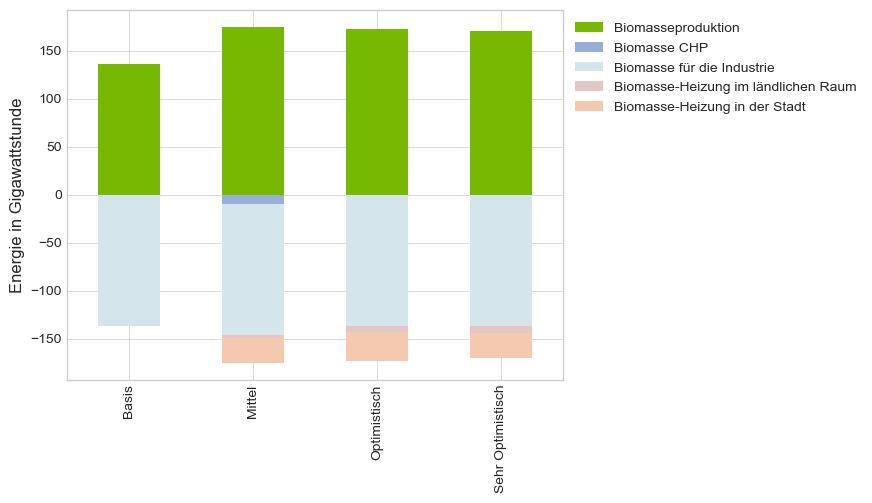

In [3]:
import pandas as pd
import myUtils as utils
import importlib
importlib.reload(utils)

import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.color_palette("muted")

df = pd.DataFrame()
for key, n in networks.items():
  s = pd.Series()
  biomass = utils.getNTimePropByGroup(n, 'Generator', 'p', utils.de_solid_biomass).sum().sum() * 3 

  biomassCHP = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_solid_biomass_chp).sum().sum() * 3 
  biomassIndustry = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_solid_biomass_industry).sum().sum() * 3 
  biomassRuralBoiler = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_rural_biomass_boiler).sum().sum() * 3 
  biomassUrbanBoiler = utils.getNTimePropByGroup(n, 'Link','p0', utils.de_urban_decentral_biomass_boiler).sum().sum() * 3 



  s['Biomasseproduktion'] = biomass
  

  s['Biomasse CHP'] =  - biomassCHP
  s['Biomasse für die Industrie'] = - biomassIndustry
  s['Biomasse-Heizung im ländlichen Raum'] = - biomassRuralBoiler
  s['Biomasse-Heizung in der Stadt'] = - biomassUrbanBoiler
  # s['Methanolisierung'] =   - (h2Electrolysis + h2Import + h2SMR + h2Dispatch + h2Industry + h2Export + h2FT )
  
  
  # # df = df.set_index('Tech')
  df[key] = s

# df.insert(0, 'unit', ['GW_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV', 'TWH_LHV' ])
df = df / 1e6
print(utils.dataframe_to_table(df))

colors = {
  'Biomasseproduktion': '#76B802',
  

  'Biomasse CHP': '#97AED9',
  'Biomasse für die Industrie': '#D5E5EC',
  'Biomasse-Heizung im ländlichen Raum': '#E5C6C6',
  'Biomasse-Heizung in der Stadt': '#F4C9B0',
}


ax = df.T.plot(kind='bar', stacked=True, color=colors)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, frameon=False)
# ax.set_xlabel('')
ax.set_ylabel('Energie in Gigawattstunde')



# plt.show()